In [1]:
import subprocess
import sys

def install(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])
install('yfinance')

In [2]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import yfinance as yf

# Series

In [3]:
prices = [42.8, 102.03, 240.38, 80.9]
s = pd.Series(prices)
print(s)

0     42.80
1    102.03
2    240.38
3     80.90
dtype: float64


In [4]:
print(s.describe())

count      4.000000
mean     116.527500
std       86.129132
min       42.800000
25%       71.375000
50%       91.465000
75%      136.617500
max      240.380000
dtype: float64


# DataFrame

In [6]:
data = {
    'date': ['2021-06-10', '2021-06-11', '2021-06-12', '2021-06-13'],
    'prices': [42.8, 102.03, 240.38, 80.9]
}
df = pd.DataFrame(data)
print(df)

         date  prices
0  2021-06-10   42.80
1  2021-06-11  102.03
2  2021-06-12  240.38
3  2021-06-13   80.90


# Web Scraping

In [7]:
data = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
print("All Tables as DataFrame\n")
print(data)

All Tables as DataFrame

[    Symbol            Security  ...      CIK      Founded
0      MMM                  3M  ...    66740         1902
1      AOS         A. O. Smith  ...    91142         1916
2      ABT              Abbott  ...     1800         1888
3     ABBV              AbbVie  ...  1551152  2013 (1888)
4     ABMD             Abiomed  ...   815094         1981
..     ...                 ...  ...      ...          ...
500    YUM         Yum! Brands  ...  1041061         1997
501   ZBRA  Zebra Technologies  ...   877212         1969
502    ZBH       Zimmer Biomet  ...  1136869         1927
503   ZION       Zions Bancorp  ...   109380         1873
504    ZTS              Zoetis  ...  1555280         1952

[505 rows x 9 columns],                    Date  ...                                             Reason
                   Date  ...                                             Reason
0     December 20, 2021  ...                   Market capitalization change.[6]
1     Decembe

In [8]:
df = data[0]
print(df)

    Symbol            Security  ...      CIK      Founded
0      MMM                  3M  ...    66740         1902
1      AOS         A. O. Smith  ...    91142         1916
2      ABT              Abbott  ...     1800         1888
3     ABBV              AbbVie  ...  1551152  2013 (1888)
4     ABMD             Abiomed  ...   815094         1981
..     ...                 ...  ...      ...          ...
500    YUM         Yum! Brands  ...  1041061         1997
501   ZBRA  Zebra Technologies  ...   877212         1969
502    ZBH       Zimmer Biomet  ...  1136869         1927
503   ZION       Zions Bancorp  ...   109380         1873
504    ZTS              Zoetis  ...  1555280         1952

[505 rows x 9 columns]


# Web Scraping

In [9]:
df1 = df[['Symbol', 'Security']]
print(df1)

    Symbol            Security
0      MMM                  3M
1      AOS         A. O. Smith
2      ABT              Abbott
3     ABBV              AbbVie
4     ABMD             Abiomed
..     ...                 ...
500    YUM         Yum! Brands
501   ZBRA  Zebra Technologies
502    ZBH       Zimmer Biomet
503   ZION       Zions Bancorp
504    ZTS              Zoetis

[505 rows x 2 columns]


In [10]:
df2 = df1[df['Security'] == 'Apple']
print(df2)

   Symbol Security
46   AAPL    Apple


In [11]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Symbol                 505 non-null    object
 1   Security               505 non-null    object
 2   SEC filings            505 non-null    object
 3   GICS Sector            505 non-null    object
 4   GICS Sub-Industry      505 non-null    object
 5   Headquarters Location  505 non-null    object
 6   Date first added       457 non-null    object
 7   CIK                    505 non-null    int64 
 8   Founded                505 non-null    object
dtypes: int64(1), object(8)
memory usage: 35.6+ KB
None


# Yahoo Finance Tesla Profile

In [12]:
url_link = 'https://finance.yahoo.com/quote/TSLA/profile'
r = requests.get(url_link, headers={
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'})
data = pd.read_html(r.text)
print(data)

[                       Name  ... Year Born
0          Mr. Elon R. Musk  ...    1972.0
1   Mr. Zachary J. Kirkhorn  ...    1985.0
2     Mr. Andrew D. Baglino  ...    1981.0
3        Mr. Vaibhav Taneja  ...    1978.0
4         Mr. Martin Viecha  ...       NaN
5         Mr. Alan Prescott  ...       NaN
6           Mr. Dave Arnold  ...       NaN
7              Brian Scelfo  ...       NaN
8   Mr. Jeffrey B. Straubel  ...    1976.0
9  Mr. Franz von Holzhausen  ...       NaN

[10 rows x 5 columns]]


# Yahoo Finance Tesla Analysis

In [13]:
url_link = 'https://finance.yahoo.com/quote/TSLA/analysis?p=TSLA'
r = requests.get(url_link, headers={
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'})
data = pd.read_html(r.text)
data = data[0]
print(data)

  Earnings Estimate  ...  Next Year (2023)
0   No. of Analysts  ...             25.00
1     Avg. Estimate  ...             12.23
2      Low Estimate  ...              6.00
3     High Estimate  ...             17.70
4      Year Ago EPS  ...              9.99

[5 rows x 5 columns]


  Earnings Estimate  ...  Next Year (2023)
1     Avg. Estimate  ...             12.23

[1 rows x 5 columns]


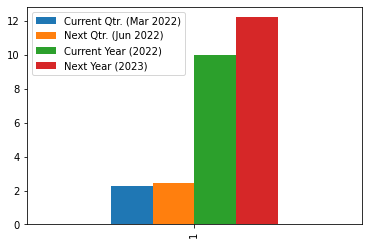

In [14]:
data1 = data[data['Earnings Estimate'] == 'Avg. Estimate']
print(data1)
data1.plot(kind='bar')

# yFinance

In [15]:
data = yf.Ticker("TSLA")

In [16]:
print(data.info['profitMargins'])
print(data.info['returnOnEquity'])

0.07403
0.15641


No Data Available then Error in Jupiter Notebook
show dividends


In [17]:
print(data.dividends)


Series([], Name: Dividends, dtype: int64)


show splits

In [18]:
print(data.splits)

Date
2020-08-31    5.0
Name: Stock Splits, dtype: float64


show balance sheet

In [19]:
print(data.balance_sheet)

                             2020-12-31  ...    2017-12-31
Intangible Assets          3.130000e+08  ...  3.615020e+08
Capital Surplus            2.726000e+10  ...  9.178024e+09
Total Liab                 2.846900e+10  ...  2.302305e+10
Total Stockholder Equity   2.222500e+10  ...  4.237242e+09
Minority Interest          1.454000e+09  ...  1.395080e+09
Other Current Liab         4.147000e+09  ...  3.098379e+09
Total Assets               5.214800e+10  ...  2.865537e+10
Common Stock               1.000000e+06  ...  1.690000e+05
Other Current Assets       2.380000e+08  ...  1.553230e+08
Retained Earnings         -5.399000e+09  ... -4.974299e+09
Other Liab                 3.302000e+09  ...  4.196294e+09
Good Will                  2.070000e+08  ...  6.023700e+07
Treasury Stock             3.630000e+08  ...  3.334800e+07
Other Assets               1.536000e+09  ...  1.166193e+09
Cash                       1.938400e+10  ...  3.367914e+09
Total Current Liabilities  1.424800e+10  ...  7.674740e+

show cashflow

In [20]:
print(data.cashflow)

                                             2020-12-31  ...    2017-12-31
Change To Liabilities                      2.423000e+09  ...  8.570000e+08
Total Cashflows From Investing Activities -3.132000e+09  ... -4.196000e+09
Net Borrowings                            -2.488000e+09  ...  3.385000e+09
Total Cash From Financing Activities       9.973000e+09  ...  4.415000e+09
Change To Operating Activities            -1.165000e+09  ... -1.150000e+09
Issuance Of Stock                          1.268600e+10  ...  6.590000e+08
Net Income                                 7.210000e+08  ... -1.962000e+09
Change In Cash                             1.311800e+10  ...  1.980000e+08
Effect Of Exchange Rate                    3.340000e+08  ...  4.000000e+07
Total Cash From Operating Activities       5.943000e+09  ... -6.100000e+07
Depreciation                               2.322000e+09  ...  1.636000e+09
Other Cashflows From Investing Activities  1.230000e+08  ...  4.600000e+07
Change To Inventory      

show earnings

In [21]:
print(data.earnings)

          Revenue    Earnings
Year                         
2017  11759000000 -1962000000
2018  21461000000  -976000000
2019  24578000000  -862000000
2020  31536000000   721000000


In [22]:
x = data.earnings
print(x)

          Revenue    Earnings
Year                         
2017  11759000000 -1962000000
2018  21461000000  -976000000
2019  24578000000  -862000000
2020  31536000000   721000000


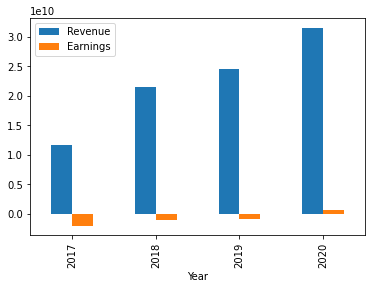

In [23]:
x.plot(kind="bar")

# Company Data

In [24]:
x = data.recommendations
x = x[x.index > '2022-01-01']
print(x)

                              Firm        To Grade From Grade Action
Date                                                                
2022-01-03 14:17:31    RBC Capital  Sector Perform              main
2022-01-03 16:33:41      JP Morgan     Underweight              main
2022-01-03 17:54:18  Deutsche Bank             Buy              main
2022-01-05 14:03:16         Mizuho             Buy              main
2022-01-05 14:17:09       Barclays     Underweight              main
2022-01-18 13:14:03  Credit Suisse         Neutral              main
2022-01-27 11:48:27      JP Morgan     Underweight              main
2022-01-27 11:53:32    Wells Fargo    Equal-Weight              main
2022-01-27 14:14:58      Citigroup            Sell              main


In [25]:
def RoE(ticker):
    data = yf.Ticker(ticker)
    roe = data.info['returnOnEquity']
    name = data.info['shortName']
    print(name, ":", roe)

RoE('AAPL')
RoE('MSFT')

Apple Inc. : 1.47443
Microsoft Corporation : 0.49051


# Stock Prices

In [26]:
print(data.history())

                   Open         High  ...  Dividends  Stock Splits
Date                                  ...                         
2021-12-28  1109.489990  1119.000000  ...          0             0
2021-12-29  1098.640015  1104.000000  ...          0             0
2021-12-30  1061.329956  1095.550049  ...          0             0
2021-12-31  1073.439941  1082.000000  ...          0             0
2022-01-03  1147.750000  1201.069946  ...          0             0
2022-01-04  1189.550049  1208.000000  ...          0             0
2022-01-05  1146.650024  1170.339966  ...          0             0
2022-01-06  1077.000000  1088.000000  ...          0             0
2022-01-07  1080.369995  1080.930054  ...          0             0
2022-01-10  1000.000000  1059.099976  ...          0             0
2022-01-11  1053.670044  1075.849976  ...          0             0
2022-01-12  1078.849976  1114.839966  ...          0             0
2022-01-13  1109.069946  1115.599976  ...          0          